 # Проект по разработке стратегии взаимодействия с клиентами на основе аналитических данных.

Заказчик: Сеть фитнес-центров «Культурист-датасаентист».

Задача: провести анализ и подготовить план действий по удержанию клиентов.

Данные: 
    «Культурист-датасаентист» предоставил сведения в csv-файлах. 
    
    Заказчик подготовил данные, которые содержат данные на месяц до оттока и факт оттока на определённый месяц. 
    
    Набор данных включает следующие поля:
- 'Churn' — факт оттока в текущем месяце;

    Текущие поля в датасете:
    
    Данные клиента за предыдущий до проверки факта оттока месяц:
    
- 'gender' — пол;
- 'Near_Location' — проживание или работа в районе, где находится фитнес-центр;
- 'Partner' — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
- Promo_friends — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
- 'Phone' — наличие контактного телефона;
- 'Age' — возраст;
- 'Lifetime' — время с момента первого обращения в фитнес-центр (в месяцах).

    Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    
- 'Contract_period' — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- 'Month_to_end_contract' — срок до окончания текущего действующего абонемента (в месяцах);
- Group_visits' — факт посещения групповых занятий;
- 'Avg_class_frequency_total' — средняя частота посещений в неделю за все время с начала действия абонемента;
- 'Avg_class_frequency_current_month' — средняя частота посещений в неделю за предыдущий месяц;
- 'Avg_additional_charges_total' — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

###  *Загрузить данные.*

In [1]:
#импорт библиотек

import pandas as pd
import datetime as dt
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import math
import scipy.stats as stats


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression


from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage 



from sklearn.linear_model import Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
#чтение файлов с данными и сохранение в соответствующую переменную

df = pd.read_csv('/datasets/gym_churn.csv', sep=',') 



###  *Исследовательский анализ данных (EDA).*

In [3]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
#размер датасета
df.shape

(4000, 14)

В датасете 4000 наблюдений и 14 полей: 13 признаков и 1 целевая переменная 'Churn' (факт оттока).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
gender                               4000 non-null int64
Near_Location                        4000 non-null int64
Partner                              4000 non-null int64
Promo_friends                        4000 non-null int64
Phone                                4000 non-null int64
Contract_period                      4000 non-null int64
Group_visits                         4000 non-null int64
Age                                  4000 non-null int64
Avg_additional_charges_total         4000 non-null float64
Month_to_end_contract                4000 non-null float64
Lifetime                             4000 non-null int64
Avg_class_frequency_total            4000 non-null float64
Avg_class_frequency_current_month    4000 non-null float64
Churn                                4000 non-null int64
dtypes: float64(4), int64(10)
memory usage: 437.6 KB


Все признаки датасета - численные значения.

В данных нет пропусков.

In [6]:
df.describe().loc[['mean', '50%', 'std']].T

,mean,50%,std
gender,0.510250,1.000000,0.499957
Near_Location,0.845250,1.000000,0.361711
Partner,0.486750,0.000000,0.499887
Promo_friends,0.308500,0.000000,0.461932
Phone,0.903500,1.000000,0.295313
Contract_period,4.681250,1.000000,4.549706
Group_visits,0.412250,0.000000,0.492301
Age,29.184250,29.000000,3.258367
Avg_additional_charges_total,146.943728,136.220159,96.355602
Month_to_end_contract,4.322750,1.000000,4.191297


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался.

In [7]:
# сгруппируем на группы: (1 - те, кто ушел) и (0 - те, кто остался)
df_gr_1 = df.loc[df['Churn'] == 1]
df_gr_0 = df.loc[df['Churn'] == 0]

In [8]:
df_gr_1.head()


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
11,1,1,1,0,1,1,0,27,266.783824,1.0,2,2.348535,1.584316,1
13,1,1,0,0,1,1,1,27,152.748668,1.0,1,0.000000,0.000000,1
21,0,0,0,0,1,1,0,30,153.198594,1.0,3,0.636382,0.000000,1
23,1,1,0,0,1,1,1,32,276.079882,1.0,1,1.420637,1.043101,1


In [9]:
df_gr_0.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [10]:
#рассчитаем среднее значение признаков в двух группах

df.groupby('Churn', as_index=False).mean().T

,0,1
Churn,0.000000,1.000000
gender,0.510037,0.510839
Near_Location,0.873086,0.768143
Partner,0.534195,0.355325
Promo_friends,0.353522,0.183789
Phone,0.903709,0.902922
Contract_period,5.747193,1.728558
Group_visits,0.464103,0.268615
Age,29.976523,26.989632
Avg_additional_charges_total,158.445715,115.082899


Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток);

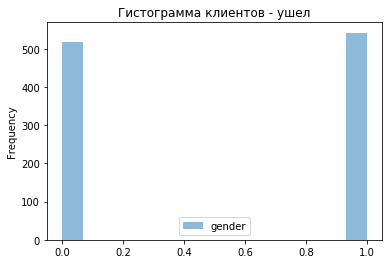

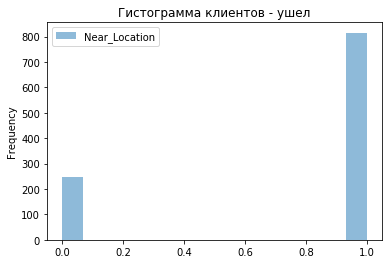

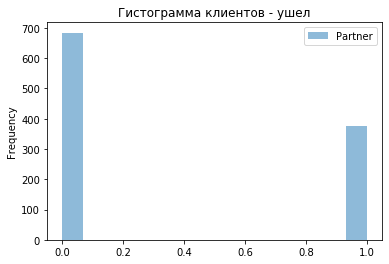

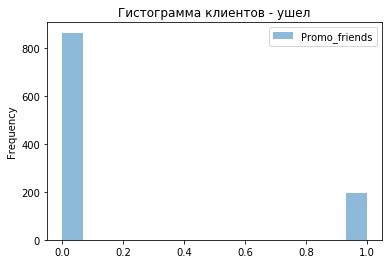

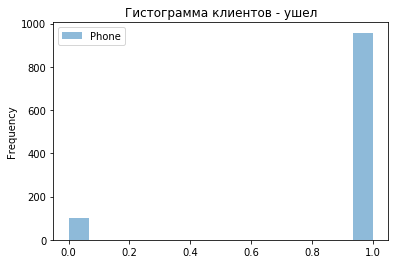

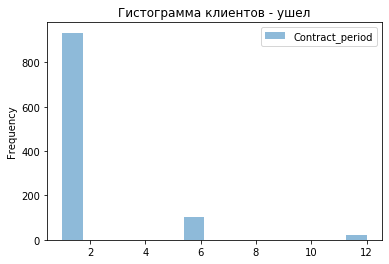

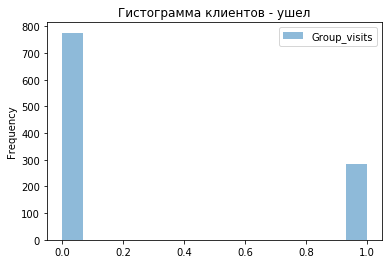

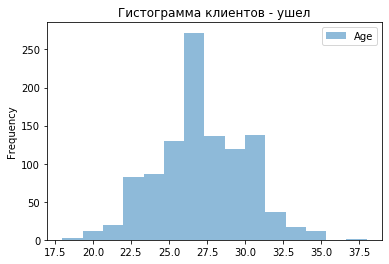

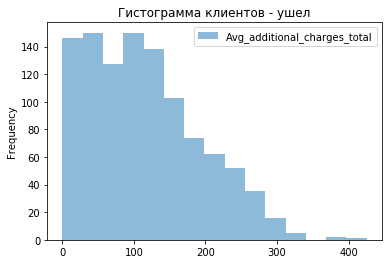

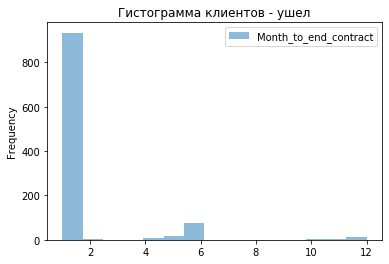

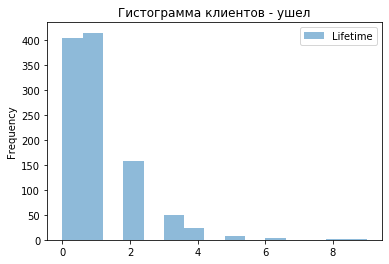

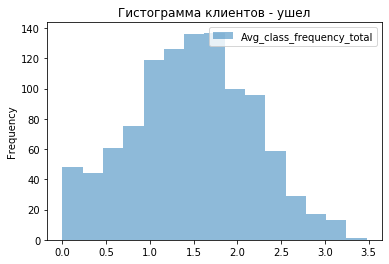

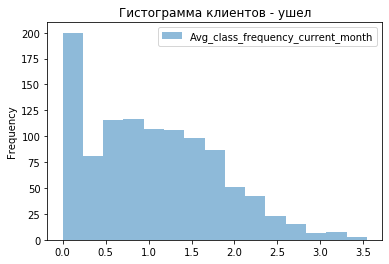

In [11]:
#построим гистаграммы признаков для клиентов-ушел
for i in df_gr_1.drop('Churn', axis = 1).columns:
    df_gr_1[i].plot(bins = 15, alpha=0.5, kind='hist', legend=True)
    plt.title('Гистограмма клиентов - ушел')
    plt.show()
    

Итак, группу клиентов - "ушел" можно охарактеризовать - это клиенты:

- проживающие/работающие от места нахождения фитнес-центра с меткой 1;
- в большей степени это сотрудники компании-партнёра клуба с меткой 0;
- использовавшие промо-код от знакомого при оплате первого абонемента с меткой 0;
- с длительностью текущего абонемента  - месяц;
- посещающие групповые занятия с меткой 0;
- средний возраст - примерно 26 лет
- со сроком меньше месяца с момента первого обращения в фитнес-центр
- в среднем посещающие фитнес-центр 1.5 раза в неделю с начала действия абонемента
- и совсем не посещающие фитнес за предыдущий месяц

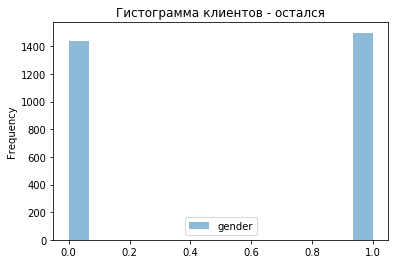

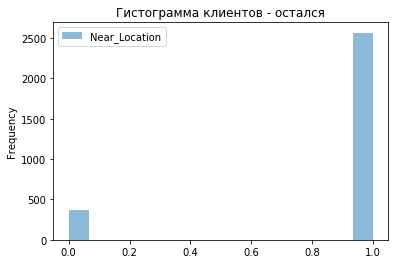

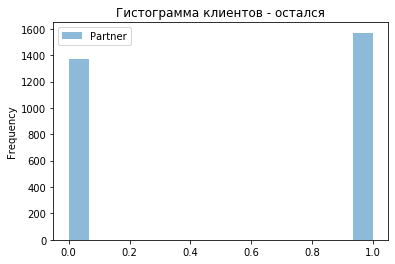

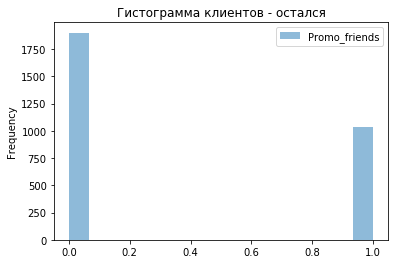

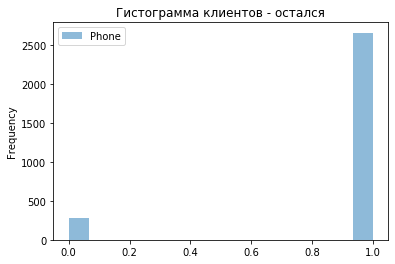

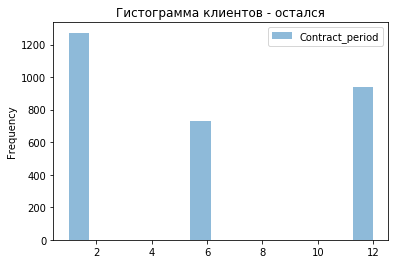

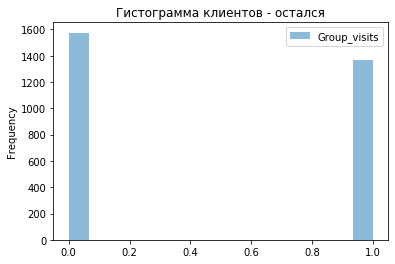

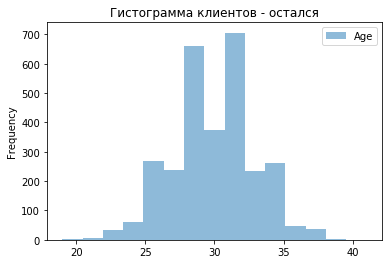

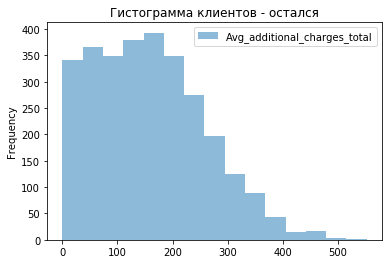

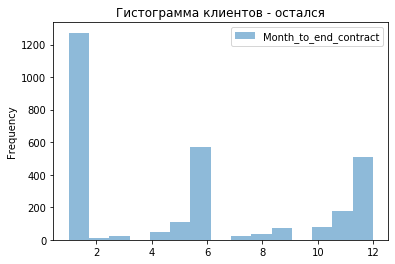

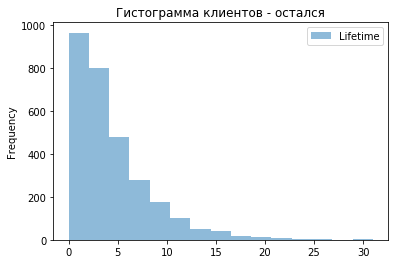

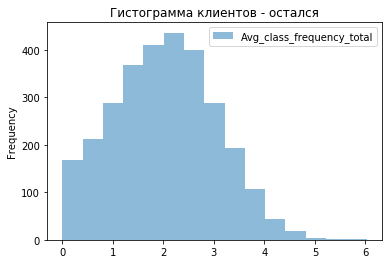

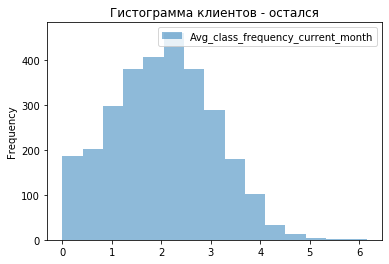

In [12]:
#построим гистаграммы признаков для клиентов-остался
for i in df_gr_0.drop('Churn', axis = 1).columns:
    df_gr_0[i].plot(bins = 15, alpha=0.5, kind='hist', legend=True)
    plt.title('Гистограмма клиентов - остался')
    plt.show()
    

Итак, группу клиентов - "остался" можно охарактеризовать - это клиенты:

- проживающие/работающие от места нахождения фитнес-центра с меткой 1;
- в большей степени использовавшие промо-код от знакомого при оплате первого абонемента с меткой 0;
- с длительностью текущего абонемента  - месяц и год;
- средний возраст - примерно 28 и 32 года
- в среднем посещающие фитнес-центр 2 раза в неделю с начала действия абонемента
- и 2.5 посещающий фитнеса за предыдущий месяц

In [13]:
#вычисляем матрицу корреляций
cm = df.corr() 

cm


,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
Near_Location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
Partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
Promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
Phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
Contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
Group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
Age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
Avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
Month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


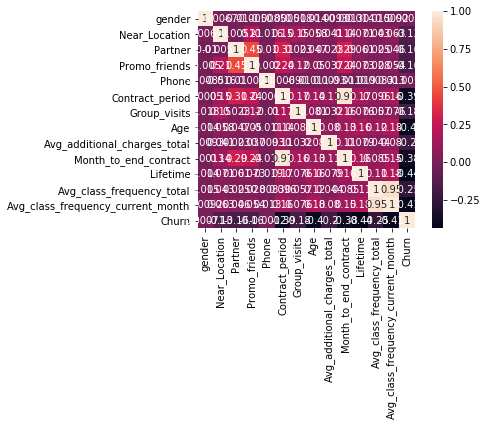

<Figure size 51840x51840 with 0 Axes>

In [14]:
#нарисуем тепловую карту с подписями для матрицы корреляций
sns.heatmap(cm, annot = True, square=True)
#ax.set_ylim(5, 0)  # корректировка "рваных" полей heatmap в последней версии библиотеки
plt.figure(figsize=(720,720))
plt.show()


По матрицы корреляции можно сделать выводы:
- срок до окончания текущего действующего абонемента (в месяцах) зависит от длительности текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
- средняя частота посещений в неделю за все время с начала действия абонемента зависит от средней частоты посещений в неделю за предыдущий месяц;

###  *Построение модели прогнозирования оттока клиентов.*

Построим модель бинарной классификации клиентов, где целевой признак - факт оттока клиента в следующем месяце.

In [15]:
#разделим наши данные на признаки (матрица X) и целевую переменную (y)
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [16]:
#разделяем модель на обучающую и валидационную выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
# обучите StandartScaler на обучающей выборке
scaler = StandardScaler()
scaler.fit(X_train)

# Преобразуйте обучающий и валидационные наборы данных
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

Обучим модель на train-выборке двумя способами:
- логической регрессией
- случайным лесом

И оценим метрики.

In [18]:
# определим функцию, которая будет выводить наши метрики
def print_all_metrics(y_true, y_pred, y_proba, title='Метрики классификации'):
    display(title)
    display('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    display('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    display('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    display('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    display('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


In [19]:
# зададим алгоритм для модели логистической регрессии
lr_model = LogisticRegression(random_state=0)
# обучим модель
lr_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:, 1]
# выведем все метрики
print_all_metrics(
    y_test,
    lr_predictions,
    lr_probabilities,
    title='Метрики для модели логистической регрессии:',
)

# зададим алгоритм для новой модели на основе алгоритма случайного леса
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0) 
# обучим модель случайного леса
rf_model.fit(X_train_st, y_train)
# воспользуемся уже обученной моделью, чтобы сделать прогнозы
rf_predictions = rf_model.predict(X_test_st) 
rf_probabilities = rf_model.predict_proba(X_test_st)[:, 1] 
# выведем все метрики
print_all_metrics(
    y_test,
    rf_predictions,
    rf_probabilities, 
    title='Метрики для модели случайного леса:'
)



/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


'Метрики для модели логистической регрессии:'

'\tAccuracy: 0.92'

'\tPrecision: 0.85'

'\tRecall: 0.83'

'\tF1: 0.84'

'\tROC_AUC: 0.97'

'Метрики для модели случайного леса:'

'\tAccuracy: 0.92'

'\tPrecision: 0.84'

'\tRecall: 0.81'

'\tF1: 0.83'

'\tROC_AUC: 0.97'

На основании метрик модель логической регрессии показала себя лучше.

###  *Кластеризация клиентов*

- Построем матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуем дендрограмму.

In [20]:
# стандартизируем данные
sc = StandardScaler()
x_sc = sc.fit_transform(X)

In [21]:

# выводим статистику по средним значениям наших признаков по кластеру
linked = linkage(x_sc, method = 'ward') 



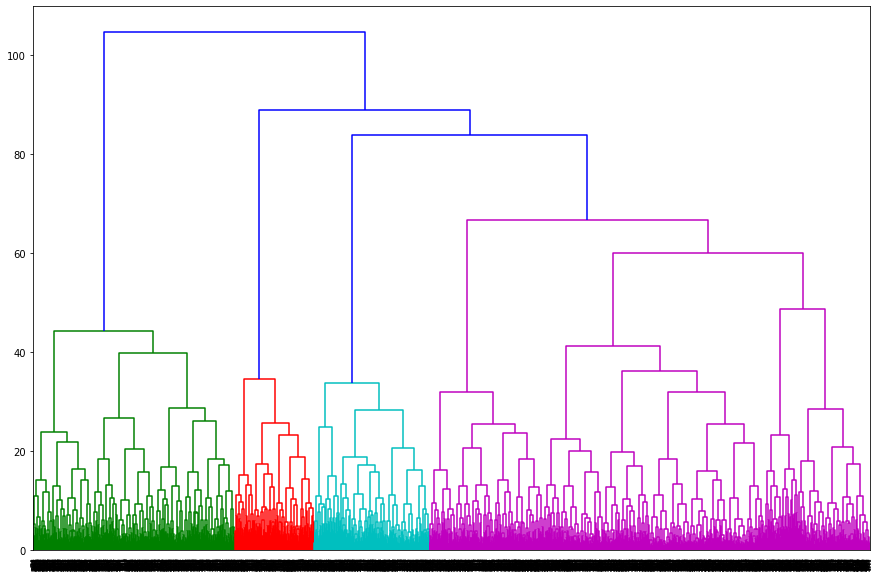

In [22]:
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.show() 

Предложенное оптимальное число кластеров 4 — четыре разных цвета на графике.

- Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов.

In [23]:
# задаём модель k_means с числом кластеров 5
km = KMeans(n_clusters = 5, random_state=0)
# прогнозируем кластеры для наблюдений (алгоритм присваивает им номера от 0 до 2)
labels = km.fit_predict(X)

In [24]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [25]:
# сохраняем метки кластера в поле нашего датасета
df['cluster'] = labels
df_cl = df.groupby('cluster')
#посчитаем среднее значение для признаков
df_cl = df_cl.mean().reset_index()
df_cl

,cluster,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,0,0.514091,0.839650,0.451895,0.279883,0.897959,4.301263,0.407191,28.973761,105.932804,3.996113,3.544218,1.852564,1.708264,0.334305
1,1,0.511435,0.844075,0.495842,0.320166,0.902287,4.755717,0.423077,29.401247,174.873445,4.376299,3.749480,1.895200,1.785569,0.226611
2,2,0.468635,0.856089,0.516605,0.332103,0.926199,5.822878,0.431734,29.845018,356.481960,5.383764,4.420664,2.019260,2.009382,0.044280
3,3,0.508721,0.824612,0.488372,0.293605,0.907946,4.198643,0.387597,28.908915,35.600722,3.855620,3.394380,1.836755,1.692641,0.349806
4,4,0.521246,0.881020,0.511331,0.347025,0.898017,5.400850,0.433428,29.344193,250.984767,5.001416,4.169972,1.903480,1.843255,0.178470


Посмотрим на средние значения признаков для кластеров. Можно предположить, что:
- клиенты кластера - "0" - это клиенты:
    - со сроком действующего текущего абонемента 4 месяца
    - возраста 29 лет
    - срок до окончания абонемента - 4 месяца
    - 3.5 месяца с первого обращения в фитнес-центр
    -  средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза
    - средняя частота посещений в неделю за предыдущий месяц - 2 раза;

- клиенты кластера - "1" - это клиенты:
    - со сроком действующего текущего абонемента 5 месяцев
    - возраста 29 лет
    - срок до окончания абонемента - 4 месяца
    - 4 месяца с первого обращения в фитнес-центр
    -  средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза
    - средняя частота посещений в неделю за предыдущий месяц - 2 раза;
    
- клиенты кластера - "2" - это клиенты:
    - со сроком действующего текущего абонемента 5 месяцев
    - возраста 29 лет
    - срок до окончания абонемента - 5 месяца
    - 4 месяца с первого обращения в фитнес-центр
    -  средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза
    - средняя частота посещений в неделю за предыдущий месяц - 2 раза;
    
- клиенты кластера - "3" - это клиенты:
    - со сроком действующего текущего абонемента 4 месяцев
    - возраста 29 лет
    - срок до окончания абонемента - 4 месяца
    - 3 месяца с первого обращения в фитнес-центр
    -  средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза
    - средняя частота посещений в неделю за предыдущий месяц - 2 раза;
    
- клиенты кластера - "4" - это клиенты:
    - со сроком действующего текущего абонемента 6 месяцев
    - возраста 30 лет
    - срок до окончания абонемента - 5 месяца
    - 4.5 месяца с первого обращения в фитнес-центр
    -  средняя частота посещений в неделю за все время с начала действия абонемента - 2 раза
    - средняя частота посещений в неделю за предыдущий месяц - 2 раза;

In [26]:
df.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0,3
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0,3
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0,1


In [27]:
# сгруппируем на группы по кластерам
df_cl_0 = df.loc[df['cluster'] == 0]
df_cl_1 = df.loc[df['cluster'] == 1]
df_cl_2 = df.loc[df['cluster'] == 2]
df_cl_3 = df.loc[df['cluster'] == 3]
df_cl_4 = df.loc[df['cluster'] == 4]

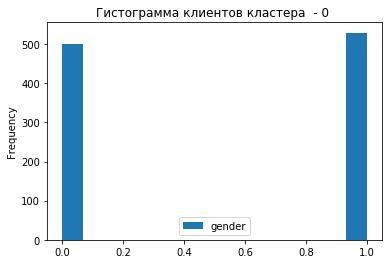

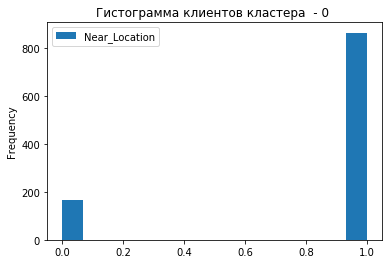

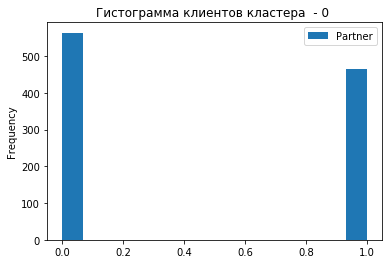

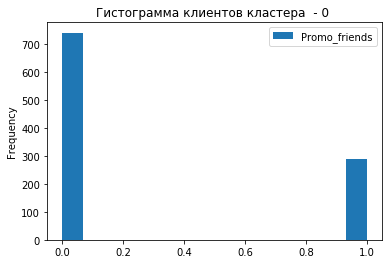

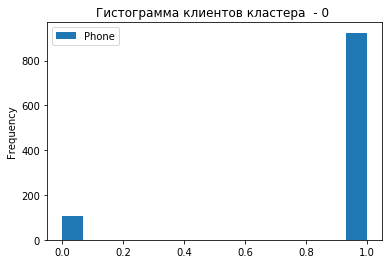

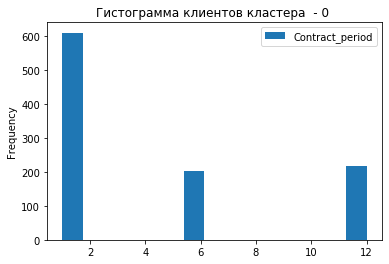

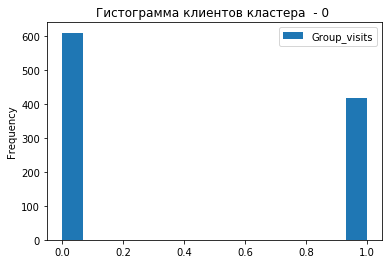

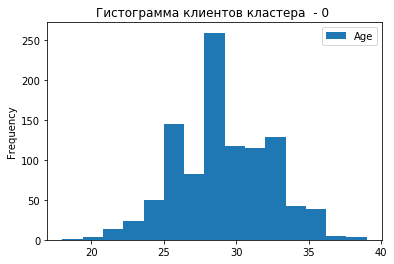

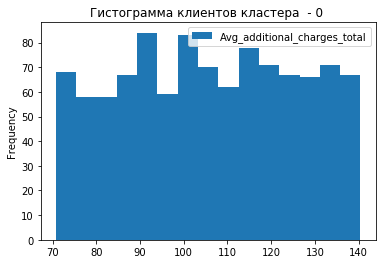

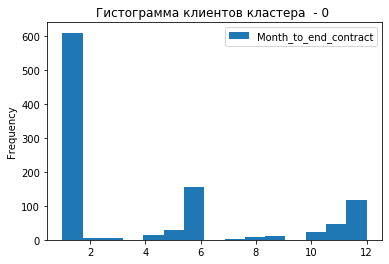

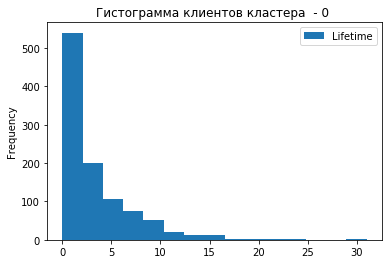

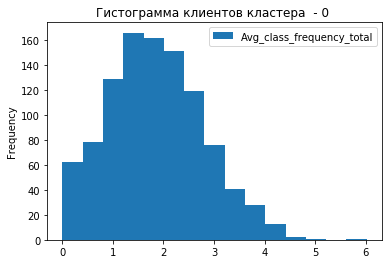

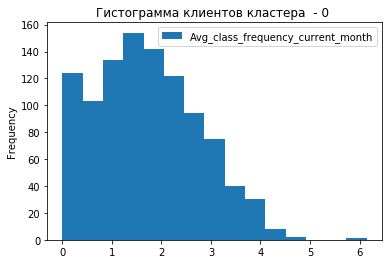

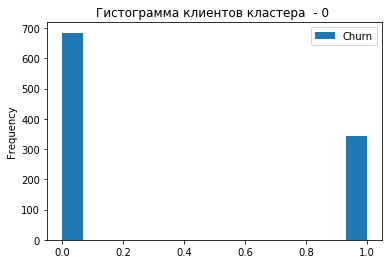

In [28]:
#построим гистаграммы признаков для клиентов кластера - 0
for i in df_cl_0.drop('cluster', axis = 1).columns:
    df_cl_0[i].plot(bins = 15, alpha=1, kind='hist', legend=True)
   
    plt.title('Гистограмма клиентов кластера  - 0 ')
    plt.show()

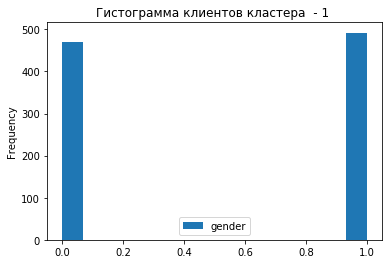

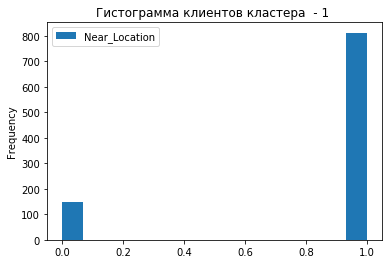

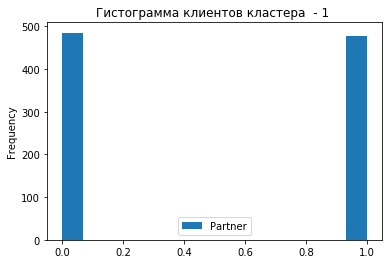

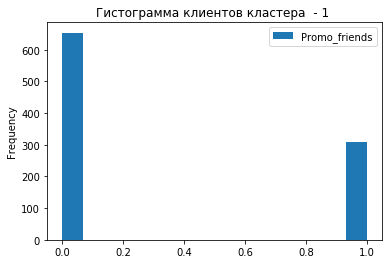

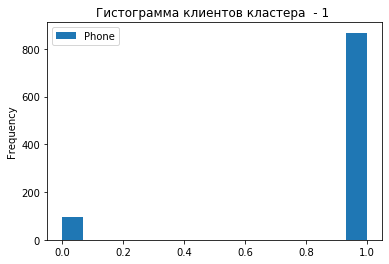

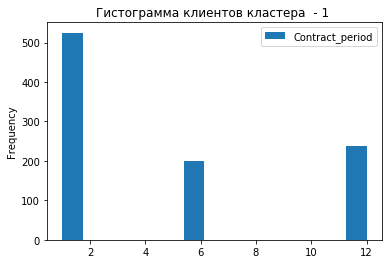

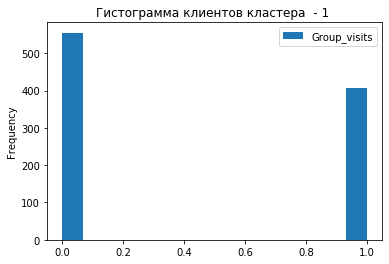

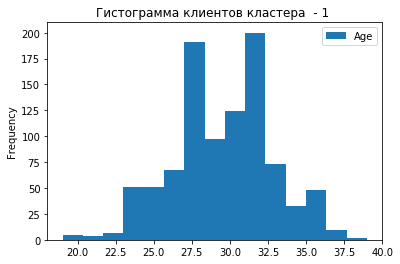

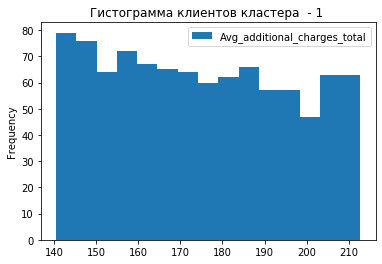

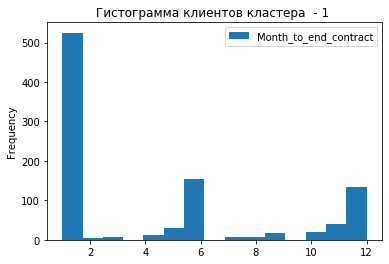

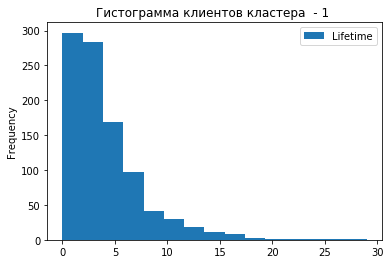

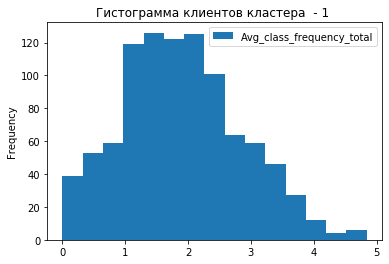

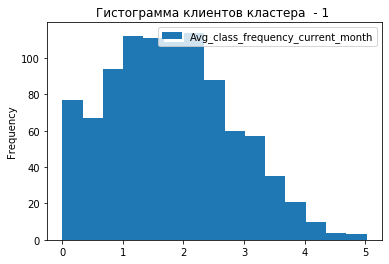

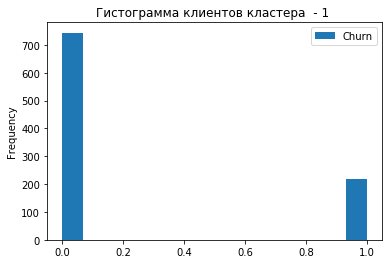

In [29]:
#построим гистаграммы признаков для клиентов кластера - 1
for i in df_cl_1.drop('cluster', axis = 1).columns:
    df_cl_1[i].plot(bins = 15, alpha=1, kind='hist', legend=True)
    plt.title('Гистограмма клиентов кластера  - 1 ')
    plt.show()

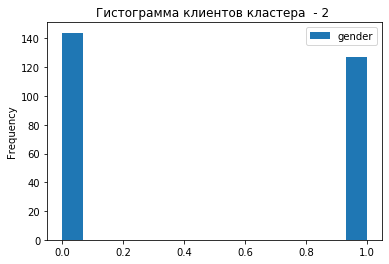

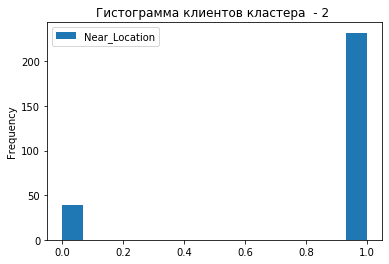

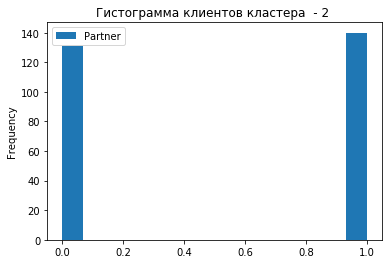

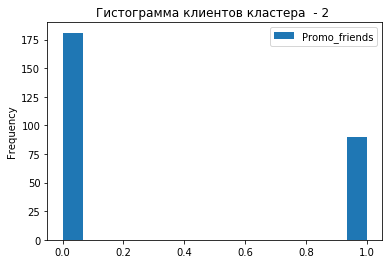

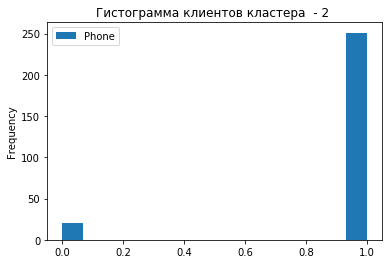

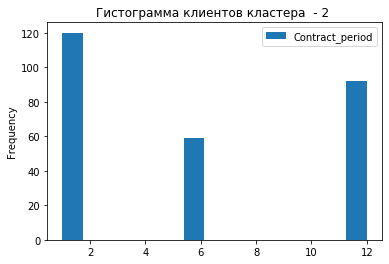

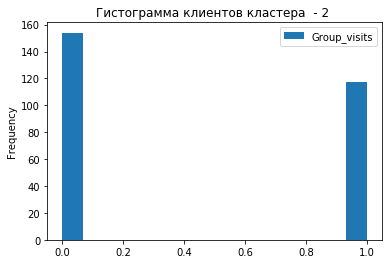

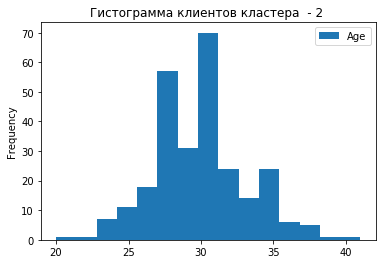

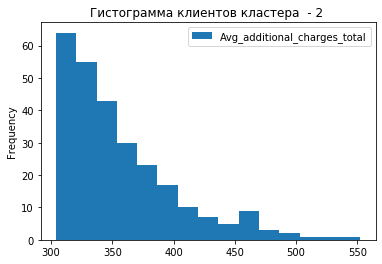

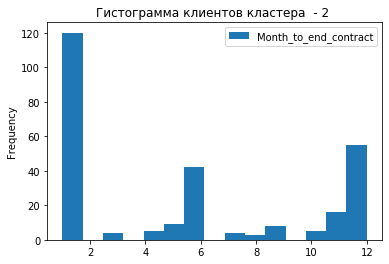

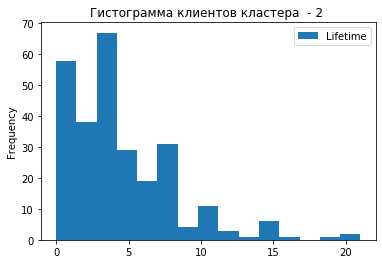

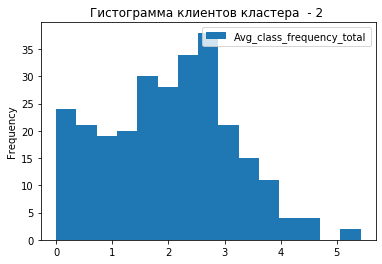

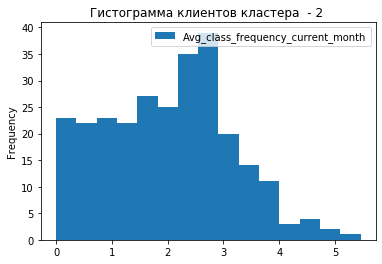

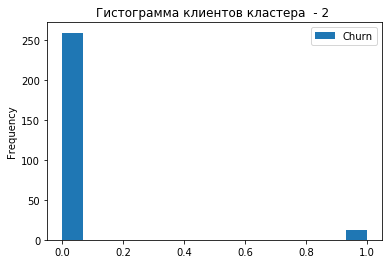

In [30]:
#построим гистаграммы признаков для клиентов кластера - 2
for i in df_cl_2.drop('cluster', axis = 1).columns:
    df_cl_2[i].plot(bins = 15, alpha=1, kind='hist', legend=True)
    plt.title('Гистограмма клиентов кластера  - 2 ')
    plt.show()

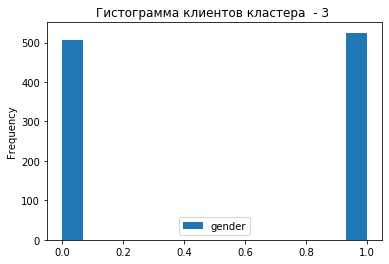

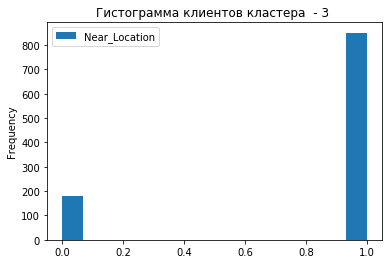

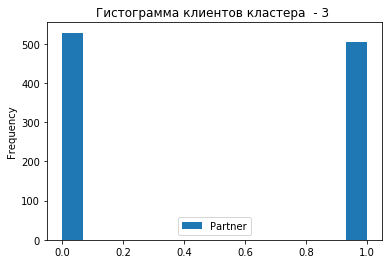

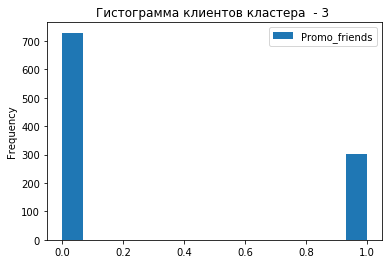

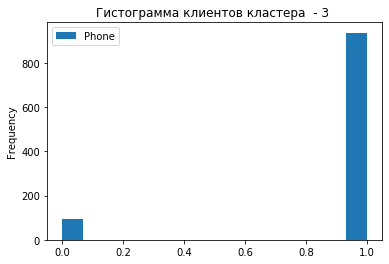

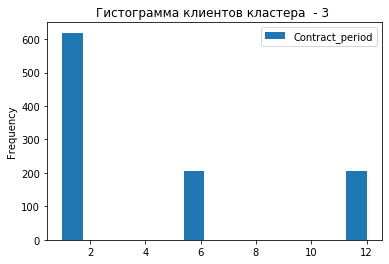

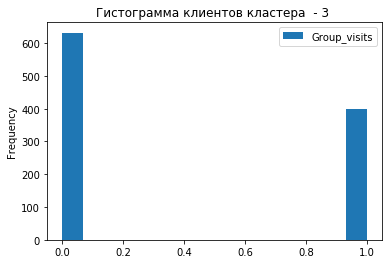

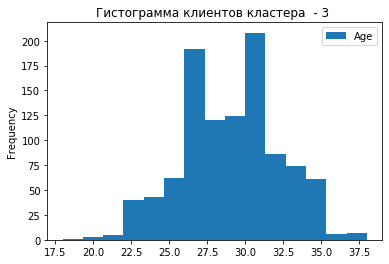

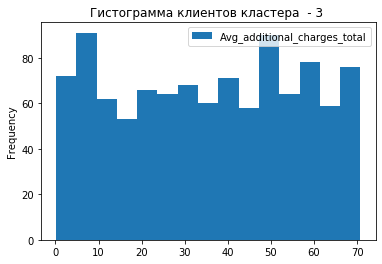

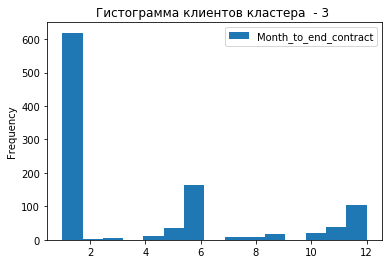

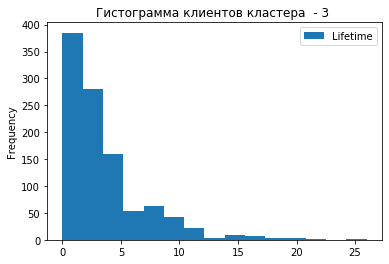

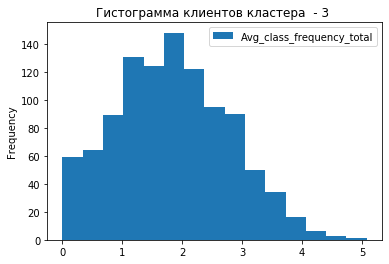

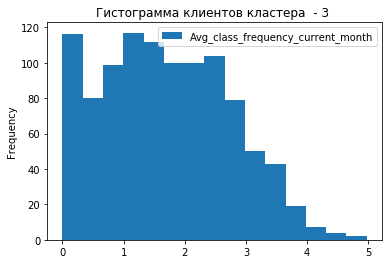

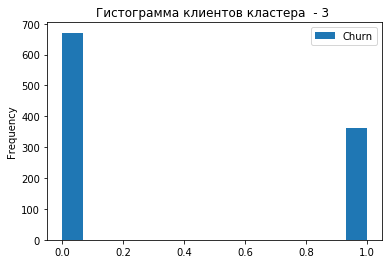

In [31]:
#построим гистаграммы признаков для клиентов кластера - 3
for i in df_cl_3.drop('cluster', axis = 1).columns:
    df_cl_3[i].plot(bins = 15, alpha=1, kind='hist', legend=True)
    plt.title('Гистограмма клиентов кластера  - 3 ')
    plt.show()

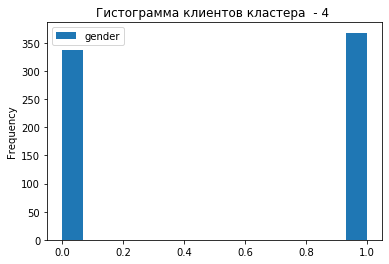

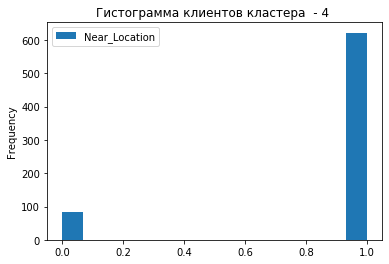

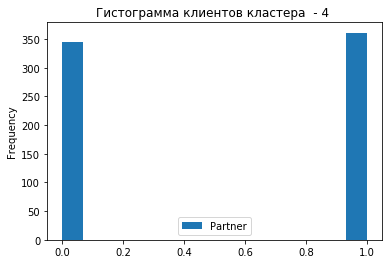

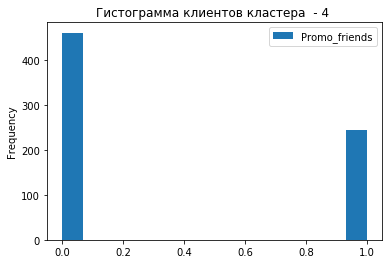

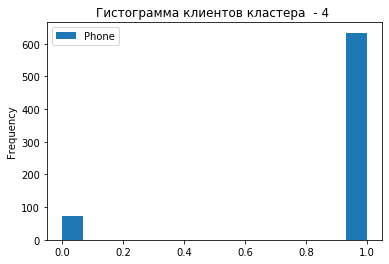

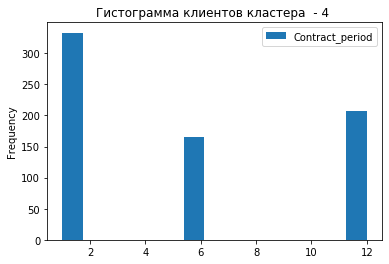

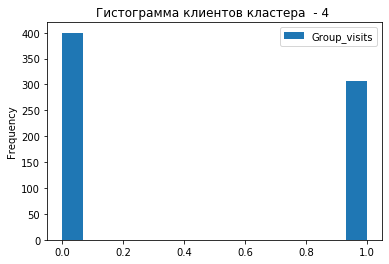

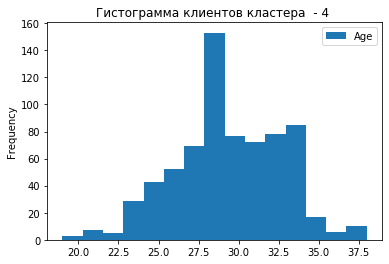

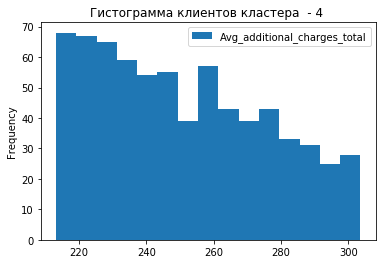

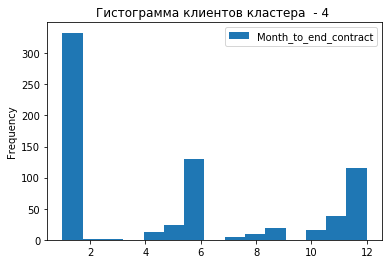

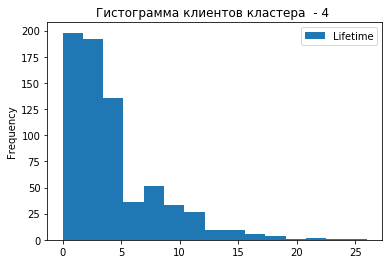

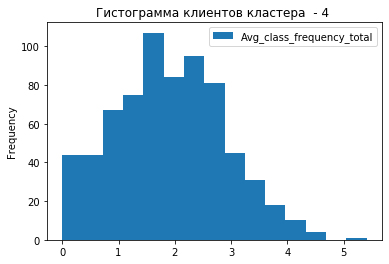

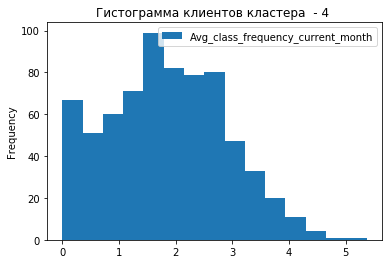

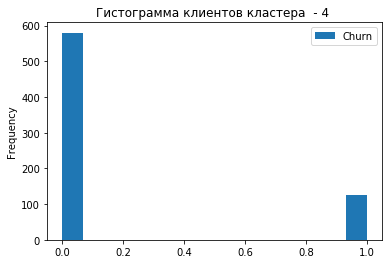

In [32]:
#построим гистаграммы признаков для клиентов кластера - 4
for i in df_cl_4.drop('cluster', axis = 1).columns:
    df_cl_4[i].plot(bins = 15, alpha=1, kind='hist', legend=True)
    plt.title('Гистограмма клиентов кластера  - 4 ')
    plt.show()

In [33]:
df_cl_0 = df.loc[df['cluster'] == 0]
df_cl_0

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn,cluster
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0,0
15,0,1,1,1,1,12,0,29,101.372604,10.0,4,2.850402,2.836455,0,0
17,0,1,0,1,1,6,1,29,92.787414,5.0,1,0.664482,0.609945,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,1,1,0,0,1,12,1,31,105.647662,12.0,4,0.594288,0.545068,0,0
3982,1,1,0,0,1,1,0,24,135.395712,1.0,0,1.390251,0.789321,1,0
3984,1,1,0,0,1,6,1,22,101.107544,6.0,2,1.377860,0.343915,1,0
3987,1,1,1,0,1,6,0,33,113.383421,6.0,8,3.620360,3.434806,0,0


In [34]:
df_cl_0_churn = df_cl_0.groupby('Churn')[['gender']].count().reset_index()
df_cl_0_churn

,Churn,gender
0,0,685
1,1,344


In [35]:
(339/(339+681))*100

33.23529411764706

In [36]:
df_cl_1_churn = df_cl_1.groupby('Churn')[['gender']].count().reset_index()
df_cl_1_churn

,Churn,gender
0,0,744
1,1,218


In [37]:
(225/(225+742))*100

23.26783867631851

In [38]:
df_cl_2_churn = df_cl_2.groupby('Churn')[['gender']].count().reset_index()
df_cl_2_churn

,Churn,gender
0,0,259
1,1,12


In [39]:
(126/(126+588))*100

17.647058823529413

In [40]:
df_cl_3_churn = df_cl_3.groupby('Churn')[['gender']].count().reset_index()
df_cl_3_churn

,Churn,gender
0,0,671
1,1,361


In [41]:
(359/(359+667))*100

34.99025341130604

In [42]:
df_cl_4_churn = df_cl_4.groupby('Churn')[['gender']].count().reset_index()
df_cl_4_churn

,Churn,gender
0,0,580
1,1,126


In [43]:
(12/(12+261))*100

4.395604395604396

Анализируя долю оттока в разбивке по кластерам, видим, что самые надежные клиенты кластера - 4 (4%), и особенно склонны к оттоку клиенты кластера - 3 (35%).

In [44]:
df.groupby('cluster')['Churn'].mean()

cluster
0    0.334305
1    0.226611
2    0.044280
3    0.349806
4    0.178470
Name: Churn, dtype: float64

### Общие выводы:

На основании анализа данных сети фитнес-центров мы выделили основные признаки группы надежных клиентов:

- проживающие/работающие от места нахождения фитнес-центра с меткой 1;
- в большей степени использовавшие промо-код от знакомого при оплате первого абонемента с меткой 0;
- со сроком действующего текущего абонемента 6 месяцев;
- срок до окончания абонемента - 5 месяца
- средний возраст - примерно 32 года
- 4.5 месяца с первого обращения в фитнес-центр
- в среднем посещающие фитнес-центр 2 раза в неделю с начала действия абонемента
- и 2.5 посещающий фитнеса за предыдущий месяц

Метрики модели логической регрессии для прогнозирования оттока клиентов показали себя лучше других моделей.


### *РЕКОМЕНДАЦИИ*:



Для удержания клиентов необходимо:
- построить прогноз оттока клиентов, используя модель логической регрессии для обучения.
- при привлечении, ориентироваться на группу "надежных" клиентов, основные признаки которой были выявлены при исследовании.